In [257]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.3 MB/s eta 0:00:00


In [258]:
import optuna

optuna.__version__

'3.1.1'

In [312]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [341]:
from sklearn.metrics import confusion_matrix

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import sklearn.ensemble
import sklearn.model_selection

# TASK 2

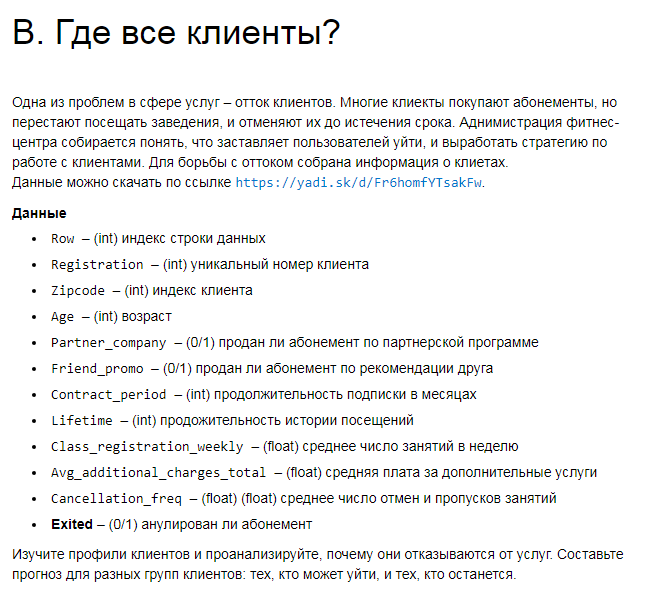

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/gym_data.csv', sep=',')
df.head()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited,Unnamed: 12
0,10001,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0,NaN
1,10002,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0,NaN
2,10003,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0,NaN
3,10004,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0,NaN
4,10005,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1,NaN


In [ ]:
df.columns

Index(['Row', 'Registration', 'Zipcode', 'Age', 'Partner_company',
       'Friend_promo', 'Contract_period', 'Lifetime',
       'Class_registration_weekly', 'Avg_additional_charges_total',
       'Cancellation_freq', 'Exited', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['Unnamed: 12'])
df.head()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,10001,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0
1,10002,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0
2,10003,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0
3,10004,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0
4,10005,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1


In [ ]:
#Сделаю копий на всякий случай
df_my = df

In [ ]:
df = df.drop(columns = ['Row'])

In [ ]:
df = df.drop(columns = ['Zipcode'])
df.head()

,Registration,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,2000159,37,0,1,6,10,1.06,134.200000,0.01,0
1,2000235,32,0,1,12,7,1.54,177.600000,0.07,0
2,2000297,29,0,1,6,5,2.15,205.000000,0.28,0
3,2000435,76,1,0,6,5,3.10,220.666667,0.39,0
4,2000774,24,1,0,1,3,1.00,142.040000,0.12,1


In [ ]:
df.corr()

,Registration,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
Registration,1.000000,0.014428,0.005111,-0.009231,0.004081,-0.005358,-0.002280,0.008094,-0.017310,-0.001464
Age,0.014428,1.000000,0.001319,0.015340,-0.077715,-0.116899,-0.128960,-0.229965,0.162721,0.373492
Partner_company,0.005111,0.001319,1.000000,-0.411229,-0.001470,0.011820,0.007755,0.019319,0.001991,-0.011876
Friend_promo,-0.009231,0.015340,-0.411229,1.000000,0.000475,-0.014500,0.000154,0.034762,-0.025547,-0.021422
Contract_period,0.004081,-0.077715,-0.001470,0.000475,1.000000,0.076211,0.092774,0.100585,-0.115249,-0.254760
Lifetime,-0.005358,-0.116899,0.011820,-0.014500,0.076211,1.000000,0.096470,0.161282,-0.124104,-0.296143
Class_registration_weekly,-0.002280,-0.128960,0.007755,0.000154,0.092774,0.096470,1.000000,0.213975,0.300244,-0.380576
Avg_additional_charges_total,0.008094,-0.229965,0.019319,0.034762,0.100585,0.161282,0.213975,1.000000,-0.171120,-0.541993
Cancellation_freq,-0.017310,0.162721,0.001991,-0.025547,-0.115249,-0.124104,0.300244,-0.171120,1.000000,0.438545
Exited,-0.001464,0.373492,-0.011876,-0.021422,-0.254760,-0.296143,-0.380576,-0.541993,0.438545,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Registration                  8100 non-null   int64  
 1   Age                           8100 non-null   int64  
 2   Partner_company               8100 non-null   int64  
 3   Friend_promo                  8100 non-null   int64  
 4   Contract_period               8100 non-null   int64  
 5   Lifetime                      8100 non-null   int64  
 6   Class_registration_weekly     8100 non-null   float64
 7   Avg_additional_charges_total  8100 non-null   float64
 8   Cancellation_freq             8100 non-null   float64
 9   Exited                        8100 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 632.9 KB


In [ ]:
df.describe()

,Registration,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
count,8.100000e+03,8100.000000,8100.000000,8100.00000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,2.499954e+06,38.788395,0.507654,0.49284,6.902716,4.583086,1.540884,177.894673,0.133910,0.244815
std,2.897209e+05,11.071217,0.499972,0.49998,4.868075,2.702545,0.802345,58.866795,0.138021,0.430004
min,2.000159e+06,16.000000,0.000000,0.00000,1.000000,1.000000,0.000000,7.600000,0.000000,0.000000
25%,2.246722e+06,31.000000,0.000000,0.00000,1.000000,3.000000,0.950000,137.280000,0.020000,0.000000
50%,2.499496e+06,37.000000,1.000000,0.00000,6.000000,4.000000,1.500000,187.220000,0.100000,0.000000
75%,2.752443e+06,44.000000,1.000000,1.00000,12.000000,6.000000,2.080000,223.000000,0.200000,0.000000
max,2.999894e+06,92.000000,1.000000,1.00000,12.000000,23.000000,4.650000,317.200000,0.860000,1.000000


<Axes: >

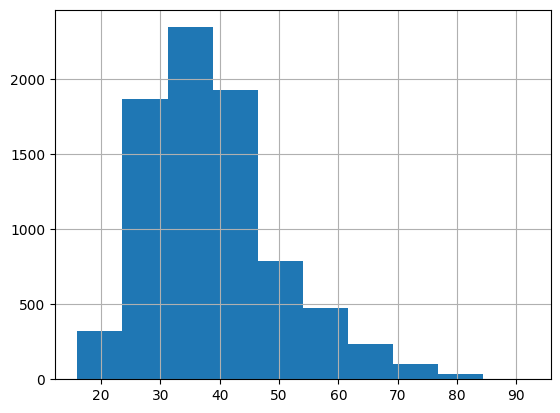

In [ ]:
df.Age.hist()

In [ ]:
df.isna().any()

Registration                    False
Age                             False
Partner_company                 False
Friend_promo                    False
Contract_period                 False
Lifetime                        False
Class_registration_weekly       False
Avg_additional_charges_total    False
Cancellation_freq               False
Exited                          False
dtype: bool

In [ ]:
df.isnull().any()

Registration                    False
Age                             False
Partner_company                 False
Friend_promo                    False
Contract_period                 False
Lifetime                        False
Class_registration_weekly       False
Avg_additional_charges_total    False
Cancellation_freq               False
Exited                          False
dtype: bool

Выборка сбалансирована?

In [ ]:
df.Exited.value_counts()

0    6117
1    1983
Name: Exited, dtype: int64

Нет, но мы пока не трогаем.. возможно позже весы добавим, если получится плохое аккураси

In [ ]:
df.groupby('Exited').mean()

,Registration,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq
Exited,,,,,,,,,
0,2.500195e+06,36.434200,0.511035,0.498937,7.608795,5.038744,1.714731,196.059422,0.099449
1,2.499209e+06,46.050429,0.497226,0.474029,4.724660,3.177509,1.004614,121.861508,0.240212


In [ ]:
df.shape

(8100, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['Exited']
X = df.drop(columns=['Exited'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [320]:
accuracies = {}
time = {}

# АНСАМБЛИ

In [321]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class MyBaggingClassifier:
    
    def __init__(self, n_estimators=10, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.classifiers = []
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for i in range(self.n_estimators):
            # Создание bootstrap-выборки
            idx = np.random.choice(len(X), len(X), replace=True)
            X_boot, y_boot = X[idx], y[idx]
            # Обучение дерева решений
            clf = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            clf.fit(X_boot, y_boot)
            self.classifiers.append(clf)
    

    def predict(self, X):
        predictions = np.zeros((len(X), self.n_estimators))
        for i, clf in enumerate(self.classifiers):
            predictions[:, i] = clf.predict(X)
        return np.round(np.mean(predictions, axis=1))

In [322]:
y_new = pd.DataFrame(y_train)
y_new = y_new.reset_index(drop=True)
y_train  = np.array(y_new)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_train_scaled  = np.array(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled = X_test_scaled.reset_index(drop=True)
X_test_scaled  = np.array(X_test_scaled)

In [323]:
from time import perf_counter
start = perf_counter()

end = perf_counter()

print(f"Time taken to execute code : {end-start}")

model = MyBaggingClassifier(max_depth = 6, random_state=48)

Time taken to execute code : 5.201800013310276e-05


In [324]:
start = perf_counter()

model.fit(X_train_scaled, y_train)
end = perf_counter()

print(f"Time taken to execute code : {end-start}")

Time taken to execute code : 0.17462600599901634


In [ ]:
time['MyBaggingClassifier']=end-start
accuracies['MyBaggingClassifier']=accuracy_score(y_test, model.predict(X_test))


In [326]:
y_pred = model.predict(X_test_scaled)

In [327]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9534979423868313

In [328]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    clf = RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)

    return cross_val_score(clf, X_train_scaled, y_train, n_jobs=-1, cv=3).mean()
start = perf_counter()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
end = perf_counter()

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

time['RandomForestClassifier']=end-start

[I 2023-04-17 00:43:13,920] A new study created in memory with name: no-name-8e0e6353-ac97-412d-a0b2-424817670dd9
[I 2023-04-17 00:43:14,115] Trial 0 finished with value: 0.9340388007054674 and parameters: {'n_estimators': 18, 'max_depth': 4.325460171663606}. Best is trial 0 with value: 0.9340388007054674.
[I 2023-04-17 00:43:14,224] Trial 1 finished with value: 0.8580246913580246 and parameters: {'n_estimators': 12, 'max_depth': 2.34115234631159}. Best is trial 0 with value: 0.9340388007054674.
[I 2023-04-17 00:43:14,359] Trial 2 finished with value: 0.9613756613756613 and parameters: {'n_estimators': 9, 'max_depth': 14.449045906625694}. Best is trial 2 with value: 0.9613756613756613.
[I 2023-04-17 00:43:14,502] Trial 3 finished with value: 0.9603174603174603 and parameters: {'n_estimators': 8, 'max_depth': 15.217682156092952}. Best is trial 2 with value: 0.9613756613756613.
[I 2023-04-17 00:43:14,596] Trial 4 finished with value: 0.8627865961199294 and parameters: {'n_estimators': 11

Accuracy: 0.9649029982363316
Best hyperparameters: {'n_estimators': 14, 'max_depth': 14.138848689869416}


In [329]:
optimised_rf = RandomForestClassifier(max_depth = int(study.best_params['max_depth']),n_estimators = int(study.best_params['n_estimators']))
optimised_rf.fit(X_train_scaled ,y_train)
accuracy_score(y_test, optimised_rf.predict(X_test))



<ipython-input-329-6bcaed68af22>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  optimised_rf.fit(X_train_scaled ,y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7559670781893004

In [319]:
start = perf_counter()
optimised_bc = BaggingClassifier(estimator=RandomForestClassifier(),
n_estimators=10, random_state=0).fit(X_train_scaled, y_train)
end = perf_counter()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
time['BaggingClassifier']=end-start
accuracies['BaggingClassifier']=accuracy_score(y_test, optimised_bc.predict(X_test))

In [330]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=max_depth, random_state=2)

    return cross_val_score(clf, X_train_scaled, y_train, n_jobs=-1, cv=3).mean()
start = perf_counter()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
end = perf_counter()

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

time['GradientBoostingClassifier']=end-start

[I 2023-04-17 00:43:54,468] A new study created in memory with name: no-name-3d4c99b9-2c4d-4d2d-ab1a-60e91faab044
[I 2023-04-17 00:43:55,170] Trial 0 finished with value: 0.9462081128747796 and parameters: {'n_estimators': 8, 'max_depth': 16.553004070888075}. Best is trial 0 with value: 0.9462081128747796.
[I 2023-04-17 00:43:55,317] Trial 1 finished with value: 0.952204585537919 and parameters: {'n_estimators': 19, 'max_depth': 1.3877111191464877}. Best is trial 1 with value: 0.952204585537919.
[I 2023-04-17 00:43:55,668] Trial 2 finished with value: 0.9617283950617285 and parameters: {'n_estimators': 16, 'max_depth': 4.75608514379044}. Best is trial 2 with value: 0.9617283950617285.
[I 2023-04-17 00:43:55,867] Trial 3 finished with value: 0.9647266313932982 and parameters: {'n_estimators': 16, 'max_depth': 2.623968744427329}. Best is trial 3 with value: 0.9647266313932982.
[I 2023-04-17 00:43:56,168] Trial 4 finished with value: 0.954673721340388 and parameters: {'n_estimators': 7, '

Accuracy: 0.9649029982363316
Best hyperparameters: {'n_estimators': 13, 'max_depth': 3.106240239615685}


In [331]:
optimised_rbc = GradientBoostingClassifier(max_depth = int(study.best_params['max_depth']), learning_rate=1.0,random_state=2,n_estimators = int(study.best_params['n_estimators']))
optimised_rbc.fit(X_train_scaled ,y_train)
accuracies['GradientBoostingClassifier']=accuracy_score(y_test, optimised_rbc.predict(X_test))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [332]:
def objective(trial):
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    clf = HistGradientBoostingClassifier(max_depth=max_depth)

    return cross_val_score(clf, X_train_scaled, y_train, n_jobs=-1, cv=3).mean()
start = perf_counter()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
end = perf_counter()

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

time['HistGradientBoostingClassifier']=end-start

[I 2023-04-17 00:44:23,164] A new study created in memory with name: no-name-e3c0f228-66ac-43c0-804b-91bcdc6f8ee2
[I 2023-04-17 00:44:24,126] Trial 0 finished with value: 0.971957671957672 and parameters: {'max_depth': 10.381797958071305}. Best is trial 0 with value: 0.971957671957672.
[I 2023-04-17 00:44:25,071] Trial 1 finished with value: 0.973721340388007 and parameters: {'max_depth': 14.792308990509204}. Best is trial 1 with value: 0.973721340388007.
[I 2023-04-17 00:44:25,708] Trial 2 finished with value: 0.973015873015873 and parameters: {'max_depth': 5.311262235508287}. Best is trial 1 with value: 0.973721340388007.
[I 2023-04-17 00:44:26,877] Trial 3 finished with value: 0.9728395061728395 and parameters: {'max_depth': 19.2705180899853}. Best is trial 1 with value: 0.973721340388007.
[I 2023-04-17 00:44:28,438] Trial 4 finished with value: 0.9724867724867726 and parameters: {'max_depth': 23.674482362786488}. Best is trial 1 with value: 0.973721340388007.
[I 2023-04-17 00:44:28

Accuracy: 0.974779541446208
Best hyperparameters: {'max_depth': 11.555848701266013}


In [333]:
optimised_hbc = HistGradientBoostingClassifier(max_depth = int(study.best_params['max_depth']))
optimised_hbc.fit(X_train_scaled ,y_train)
accuracies['HistGradientBoostingClassifier']=accuracy_score(y_test, optimised_hbc.predict(X_test))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [334]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    clf = AdaBoostClassifier(n_estimators=n_estimators)

    return cross_val_score(clf, X_train_scaled, y_train, n_jobs=-1, cv=3).mean()
start = perf_counter()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
end = perf_counter()

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

time['AdaBoostClassifier']=end-start

[I 2023-04-17 00:45:08,848] A new study created in memory with name: no-name-4f86e84e-02d2-4012-9039-28340972fa29
[I 2023-04-17 00:45:09,264] Trial 0 finished with value: 0.9414462081128748 and parameters: {'n_estimators': 12}. Best is trial 0 with value: 0.9414462081128748.
[I 2023-04-17 00:45:09,414] Trial 1 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 3}. Best is trial 0 with value: 0.9414462081128748.
[I 2023-04-17 00:45:10,004] Trial 2 finished with value: 0.9379188712522047 and parameters: {'n_estimators': 10}. Best is trial 0 with value: 0.9414462081128748.
[I 2023-04-17 00:45:10,474] Trial 3 finished with value: 0.9118165784832453 and parameters: {'n_estimators': 5}. Best is trial 0 with value: 0.9414462081128748.
[I 2023-04-17 00:45:10,885] Trial 4 finished with value: 0.9326278659611993 and parameters: {'n_estimators': 9}. Best is trial 0 with value: 0.9414462081128748.
[I 2023-04-17 00:45:11,104] Trial 5 finished with value: 0.9326278659611993 and

Accuracy: 0.9553791887125221
Best hyperparameters: {'n_estimators': 20}


In [339]:
optimised_ab = AdaBoostClassifier(n_estimators = int(study.best_params['n_estimators']))
optimised_ab.fit(X_train_scaled ,y_train)
accuracies['AdaBoostClassifier']=accuracy_score(y_test, optimised_ab.predict(X_test))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


# АНАЛИЗ РЕЗУЛЬТАТОВ

In [336]:

import matplotlib.pyplot as plt
import seaborn as sns

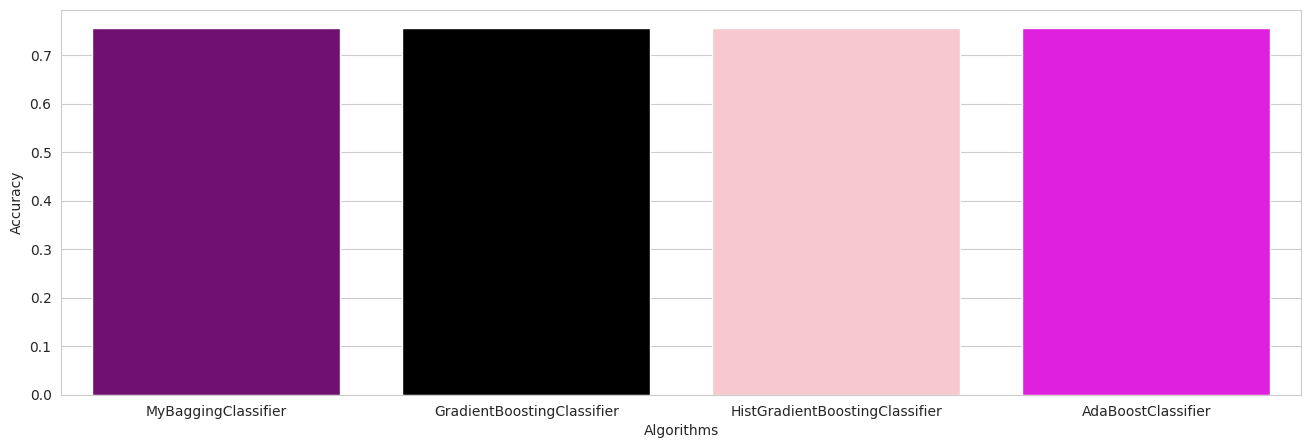

In [340]:
colors = ["purple", "black", "pink", "magenta", "blue","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

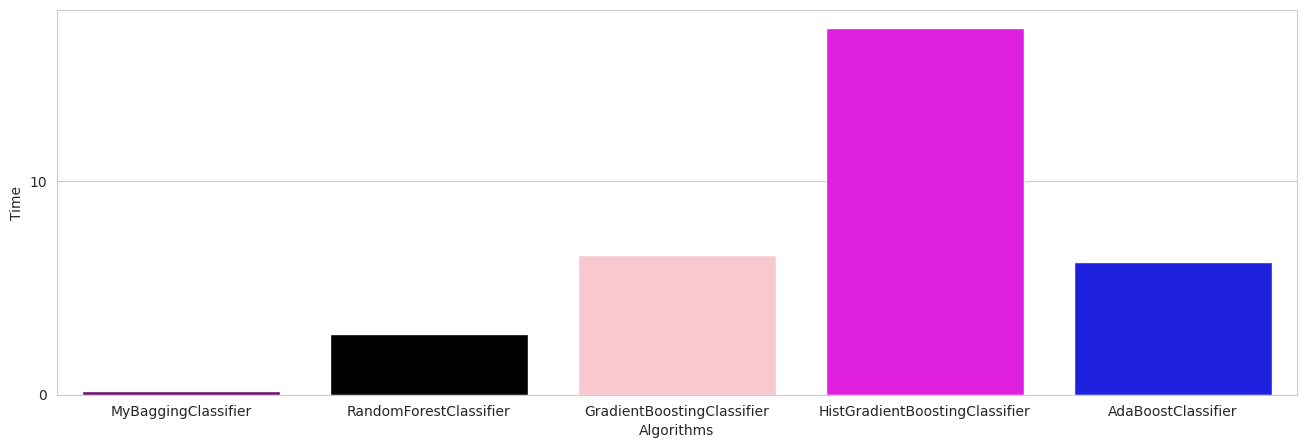

In [338]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 300, 10))
plt.ylabel("Time")
plt.xlabel("Algorithms")
sns.barplot(x=list(time.keys()), y=list(time.values()), palette=colors)
plt.show()

In [345]:
y_head_lr = optimised_rf.predict(X_test_scaled)
y_head_rbc = optimised_rbc.predict(X_test_scaled)
y_head_hbc = optimised_hbc.predict(X_test_scaled)
y_head_ab = optimised_ab.predict(X_test_scaled)
y_head_bc = optimised_bc.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_head_lr)
cm_rbc = confusion_matrix(y_test, y_head_rbc)
cm_hbc = confusion_matrix(y_test, y_head_hbc)
cm_ab = confusion_matrix(y_test, y_head_ab)
cm_bc = confusion_matrix(y_test, y_head_bc)

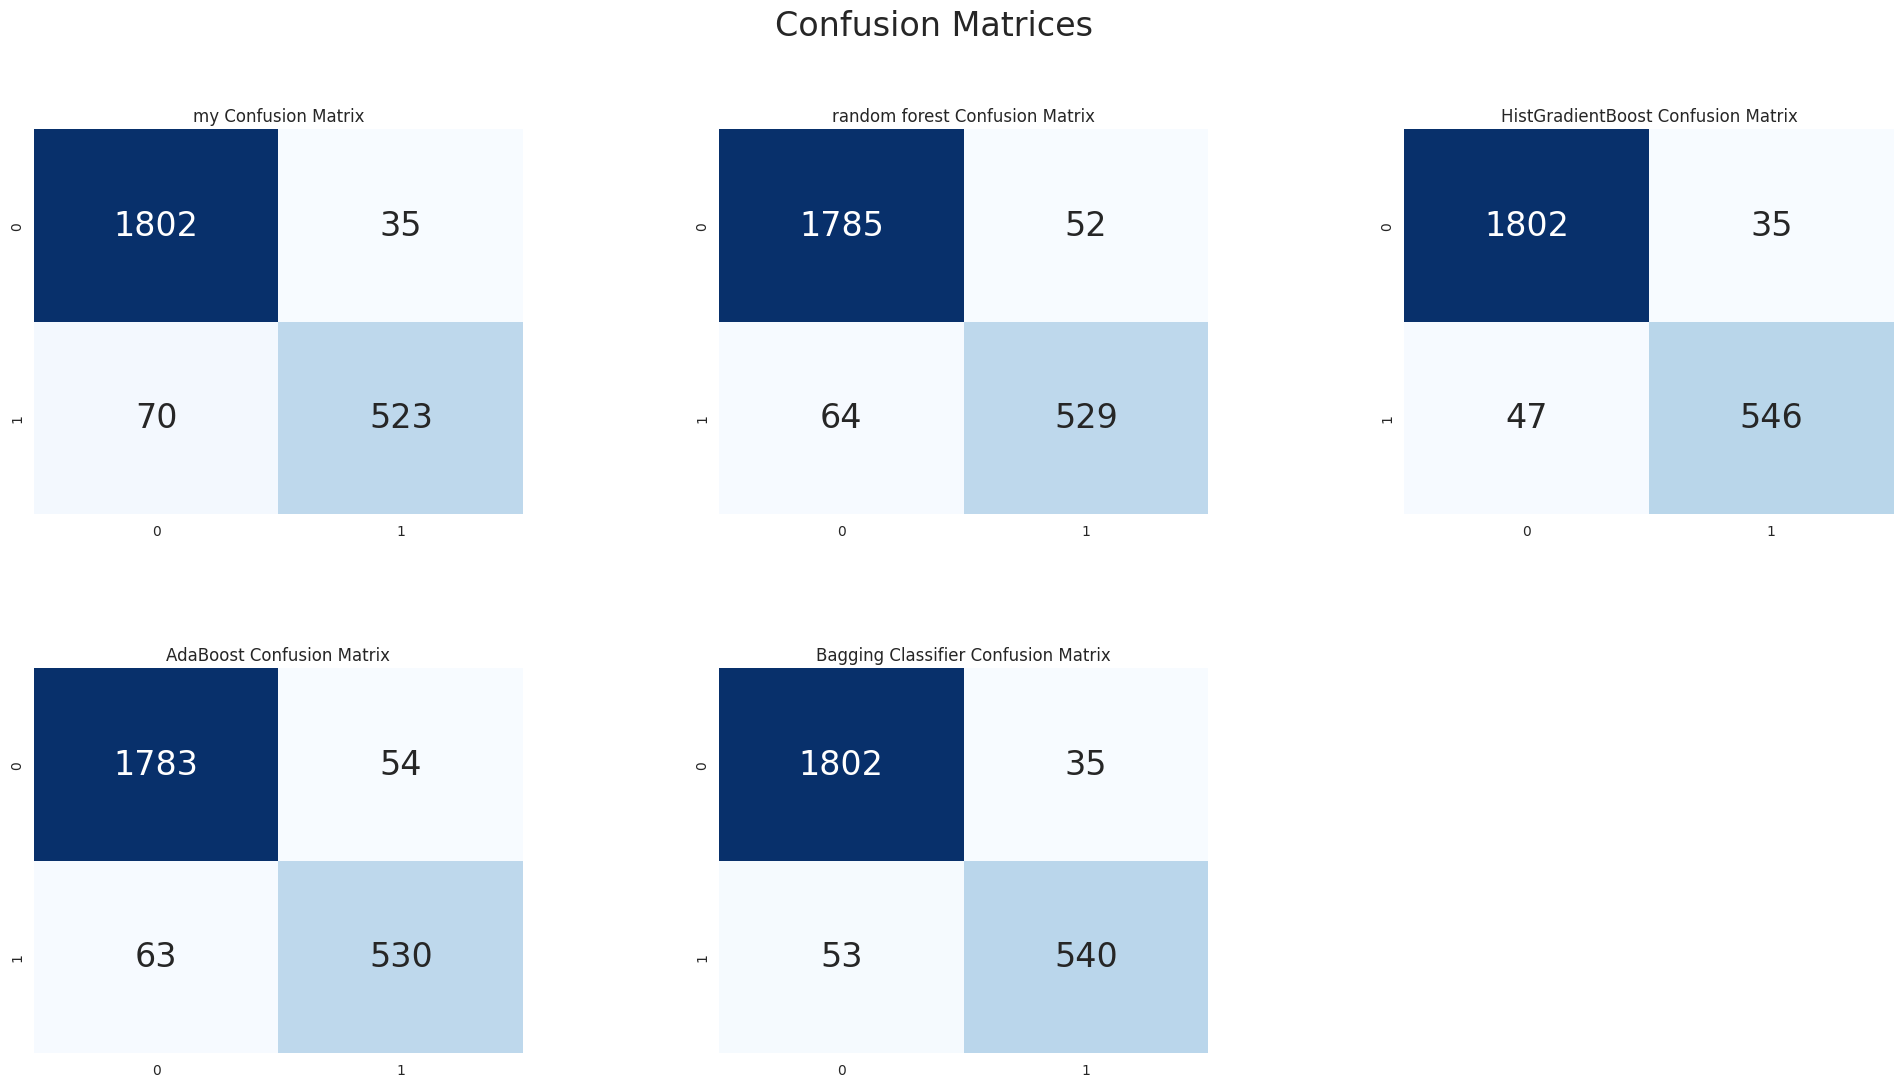

In [347]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("my Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("random forest Confusion Matrix")
sns.heatmap(cm_rbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("HistGradientBoost Confusion Matrix")
sns.heatmap(cm_hbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(cm_ab,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Bagging Classifier Confusion Matrix")
sns.heatmap(cm_bc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Далее идет код для Яндекс.Контест

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy на обучающей выборке  : {:.2f}%".format(accuracy) )

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train_scaled, y_train)  

In [ ]:
#  Используем классификатор на обучающей и тестовой выборках

y_pred_train = classifier.predict(X_train_scaled)  
y_pred_test = classifier.predict(X_test_scaled)  


In [ ]:
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(classification_report(y_train, y_pred_train)) 

In [ ]:
print('Accuracy на тестовой выборке : ', accuracy_score(y_test, y_pred_test, normalize=True))
print(classification_report(y_test, y_pred_test))  

In [ ]:

print(u'Таблица сопряженности для обучающей выборки')
print(confusion_matrix(y_train, y_pred_train))  

In [ ]:
print(u'Таблица сопряженности для тестовой выборки')
print(confusion_matrix(y_test, y_pred_test))  

# ТЕСТ для яндекса

In [ ]:
df_test = pd.read_csv('/content/gym_test.csv', sep=',')
df_test.head()

In [ ]:
df_test = df_test.drop(columns = ['Row'])
df_test = df_test.drop(columns = ['Zipcode'])

In [ ]:
df_test = df_test.drop(columns = ['Exited'])
df_test

In [ ]:
scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
df_test_scaled = scaler.transform(df_test)

In [ ]:
df_pred_test = classifier.predict(df_test_scaled) 

In [ ]:
df_pred_test

In [ ]:
ans = pd.read_csv('/content/gym_test.csv', sep=',')
ans.head()

In [ ]:
ans = ans.drop(columns = ['Exited'])

In [ ]:
ans['Exited'] = df_pred_test
ans

In [ ]:
ans.to_csv(r'/content/gym_test2.csv', index= False )

In [ ]:
minu = pd.read_csv('/content/gym_test2.csv', sep=',')
minu.head()